In [313]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle
from scipy.stats import norm

In [314]:
def peak_heat(n, alphafc, a, b ):
    return a*np.power(n, alphafc) + b

#def peak_heat(n, alphafc, a ):
    #return alphafc*n+a


Значения из статьи Палисетто: 

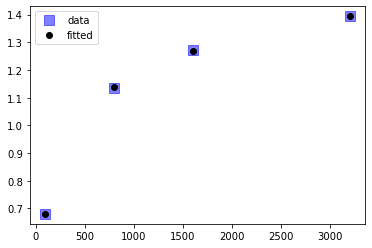

In [315]:
ns = np.array([100, 800, 1600, 3200])
heat = np.array([68, 909, 2034, 4460])/ns

popt, pcov = curve_fit(peak_heat, ns , heat,  p0 = [-1/7, 1, 1] )  


perr = np.sqrt(np.diag(pcov))
 
plt.plot(ns, heat, "s", alpha = 0.5, label = "data", c = "b", markersize = 10)


plt.plot(ns, peak_heat(ns, popt[0], popt[1],popt[2]  ), "o", label = "fitted", c = "k")


plt.legend()

In [316]:
print("2ф-1 = ", popt[0])

2ф-1 =  -0.09728424765618898


In [317]:
-1/7

-0.14285714285714285

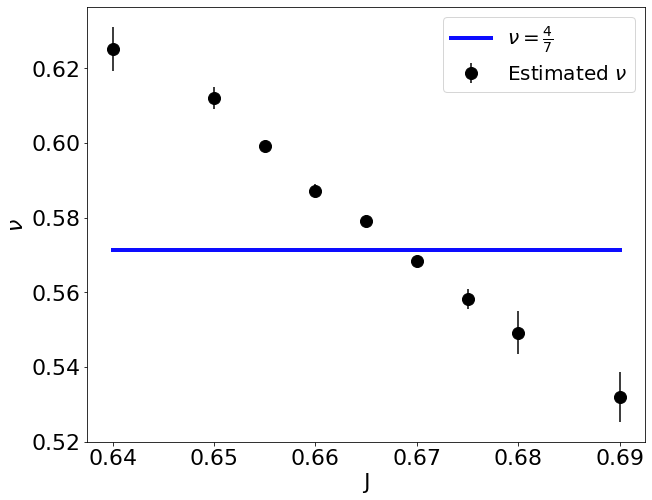

In [305]:
def r_on_n(n, nu, b):
    return 2*nu*n+b

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Homopolymer_simulations/Canonical/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/longnear.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)

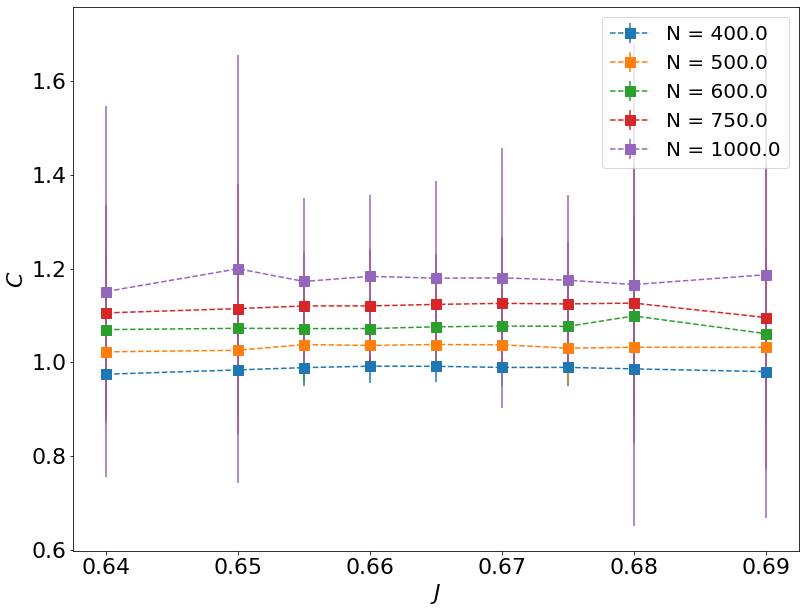

In [312]:
data_np = np.loadtxt("Homopolymer_simulations/Canonical/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
 

for l in lengths:
    if (l<100):
        continue
        
        
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = []
    errs=[]
    
    for j in range(len(J_l)):
        e1 = norm.rvs(data_l[j, 7], data_l[j, 8], size = 1000)
        e2 = norm.rvs(data_l[j, 9], data_l[j, 10], size = 1000)
    
        cum = (e2 - e1*e1)*l#*np.square(J_l[j])
        mean = np.mean(cum)
        
        err=np.std(cum)#/np.sqrt(len(cum))
        
        bc.append(mean)
        errs.append(err)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(0.4, 0.6)
#plt.ylim(0.9, 1.4 )
#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)


In [307]:
data_np = np.loadtxt("Homopolymer_simulations/Canonical/longnear.txt", skiprows=0)

data_l = data_np[data_np[:,1]==0.665]


In [308]:
heat, errs

(array([0.68   , 1.13625, 1.27125, 1.39375]),
 [0.3873521728158317,
  0.4532679973755487,
  0.1939920958224235,
  0.16523603096589953,
  0.19935667549287736,
  0.28298192566786057,
  0.19539295072553362,
  0.5247912709796294,
  0.4974130768888226])

In [309]:
heat = []
errs=[]
ns = []
J = 0.665
for j in range(len(lengths)):
 

    if (lengths[j]<500):
        continue
     
    e1 = norm.rvs(data_l[j, 7], data_l[j, 8], size = 1000)
    e2 = norm.rvs(data_l[j, 9], data_l[j, 10], size = 1000)

    cum = (e2 - e1*e1) *lengths[j]**1#*J*J
    mean = np.mean(cum)

    err=np.std(cum)#/np.sqrt(len(cum))

    heat.append(mean)
    errs.append(err)
    ns.append(lengths[j])

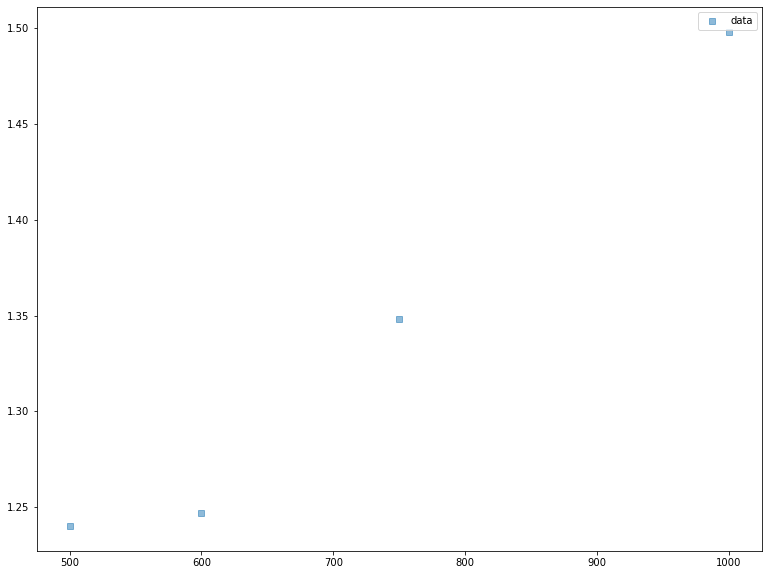

In [310]:
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


plt.plot(ns, heat, "s", alpha = 0.5, label = "data")


#plt.plot(ns, peak_heat(ns, popt[0], popt[1] ), "o", label = "fitted")


plt.legend()